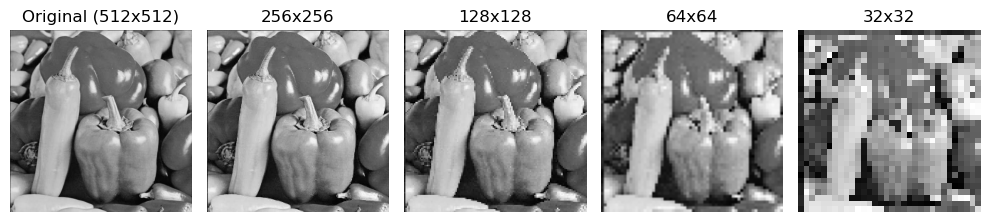

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sub-sampling
def downscale(img):
    """Downscale an image by factors of 2 using sub-sampling (removing every other row and column)."""
    sizes = [256, 128, 64, 32]  
    downsampled_images = {}  

    for size in sizes:
        img = img[::2, ::2]  
        downsampled_images[size] = img  

    return downsampled_images

# load and read the grayscale image
g_img = cv2.imread("../test_imgs/vegetables.png", cv2.IMREAD_GRAYSCALE)

if g_img is None:
    raise FileNotFoundError("Images not found. Please check file paths.")

if g_img.shape != (512, 512):
    raise ValueError("Input image must be 512x512.")

# Apply sub-sampling
downsampled = downscale(g_img)

plt.figure(figsize=(10, 6))

plt.subplot(1, 5, 1)
plt.imshow(g_img, cmap='gray')
plt.title("Original (512x512)")
plt.axis("off")

for i, (size, img) in enumerate(downsampled.items()):
    plt.subplot(1, 5, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"{size}x{size}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("output_imgs/problem3.png")
plt.show()

for size, img in downsampled.items():
    cv2.imwrite(f"downsampled_{size}.png", img)